In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
# Load the dataset from the provided file "train.csv"
file_path = 'train.csv'  # Update the file path as required
df = pd.read_csv(file_path)
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


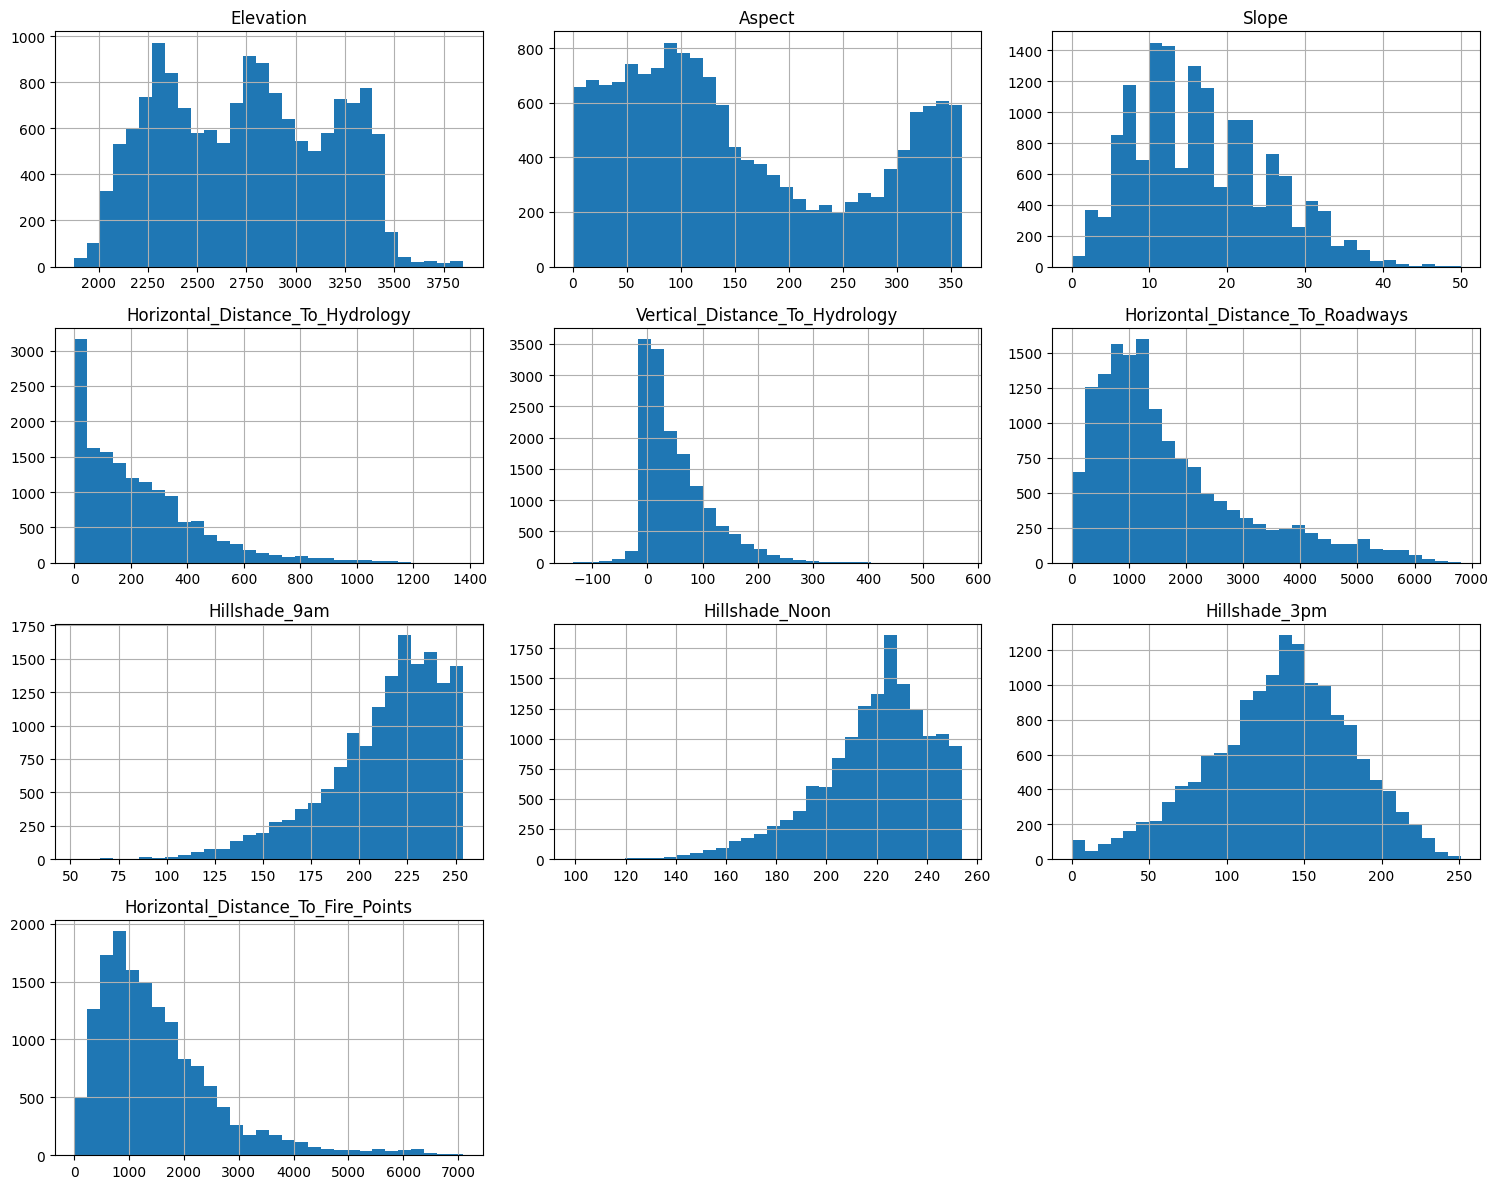

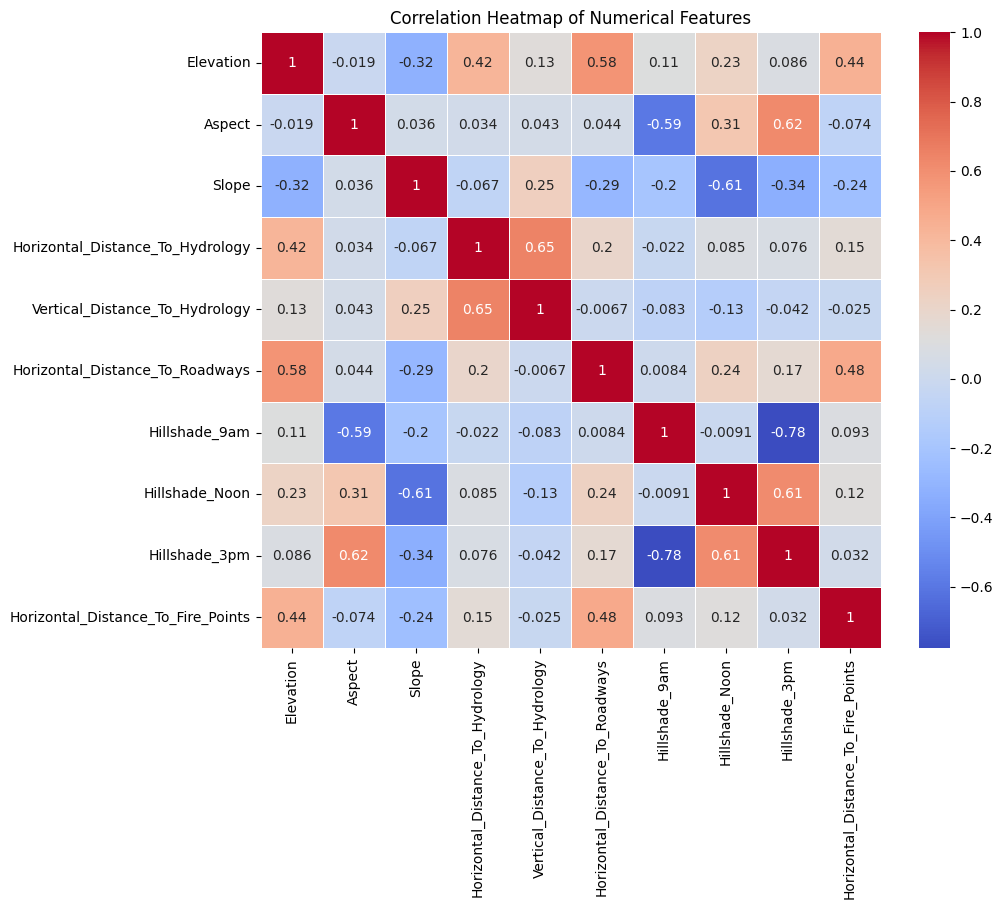

In [9]:



# Now we will create visualizations for this full dataset. We will:
# - Plot histograms for the numerical features
# - Consider a heatmap for correlation between continuous numerical features

# Extracting numerical features for visualization
numerical_features = [
    "Elevation", "Aspect", "Slope", 
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Roadways", "Hillshade_9am", 
    "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"
]

# Plot histograms of the numerical features for the full dataset
df[numerical_features].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

# Plot correlation heatmap for numerical features

plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [19]:
# Dropping non-numerical columns and the target column 'Cover_Type'
# Since we want to normalize only the numerical features
columns_to_normalize = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
    'Horizontal_Distance_To_Fire_Points'
]

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[columns_to_normalize] = scaler_standard.fit_transform(df_standardized[columns_to_normalize])

# Min-Max Scaling (0-1 normalization)
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[columns_to_normalize] = scaler_minmax.fit_transform(df_minmax_scaled[columns_to_normalize])

# Display the normalized datasets
print("Standardized dataset:")
print(df_standardized.head())

print("\nMin-Max Scaled dataset:")
print(df_minmax_scaled.head())

Standardized dataset:
       Id  Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0  242642   0.315874 -0.235412  0.637808                         -0.087846   
1  309891   0.611820  1.778407 -0.299584                          0.065125   
2  287847   1.139272 -0.845936 -0.299584                          1.862539   
3  516307   1.311111  1.468589 -1.002628                          2.068094   
4  124860   0.790820 -1.101081 -1.236976                         -0.255159   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                        0.043699                        -0.524709   
1                       -1.094171                        -0.260842   
2                       -0.801576                        -0.470582   
3                        0.141231                        -0.726179   
4                       -0.411449                         1.493755   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0       1.206733   

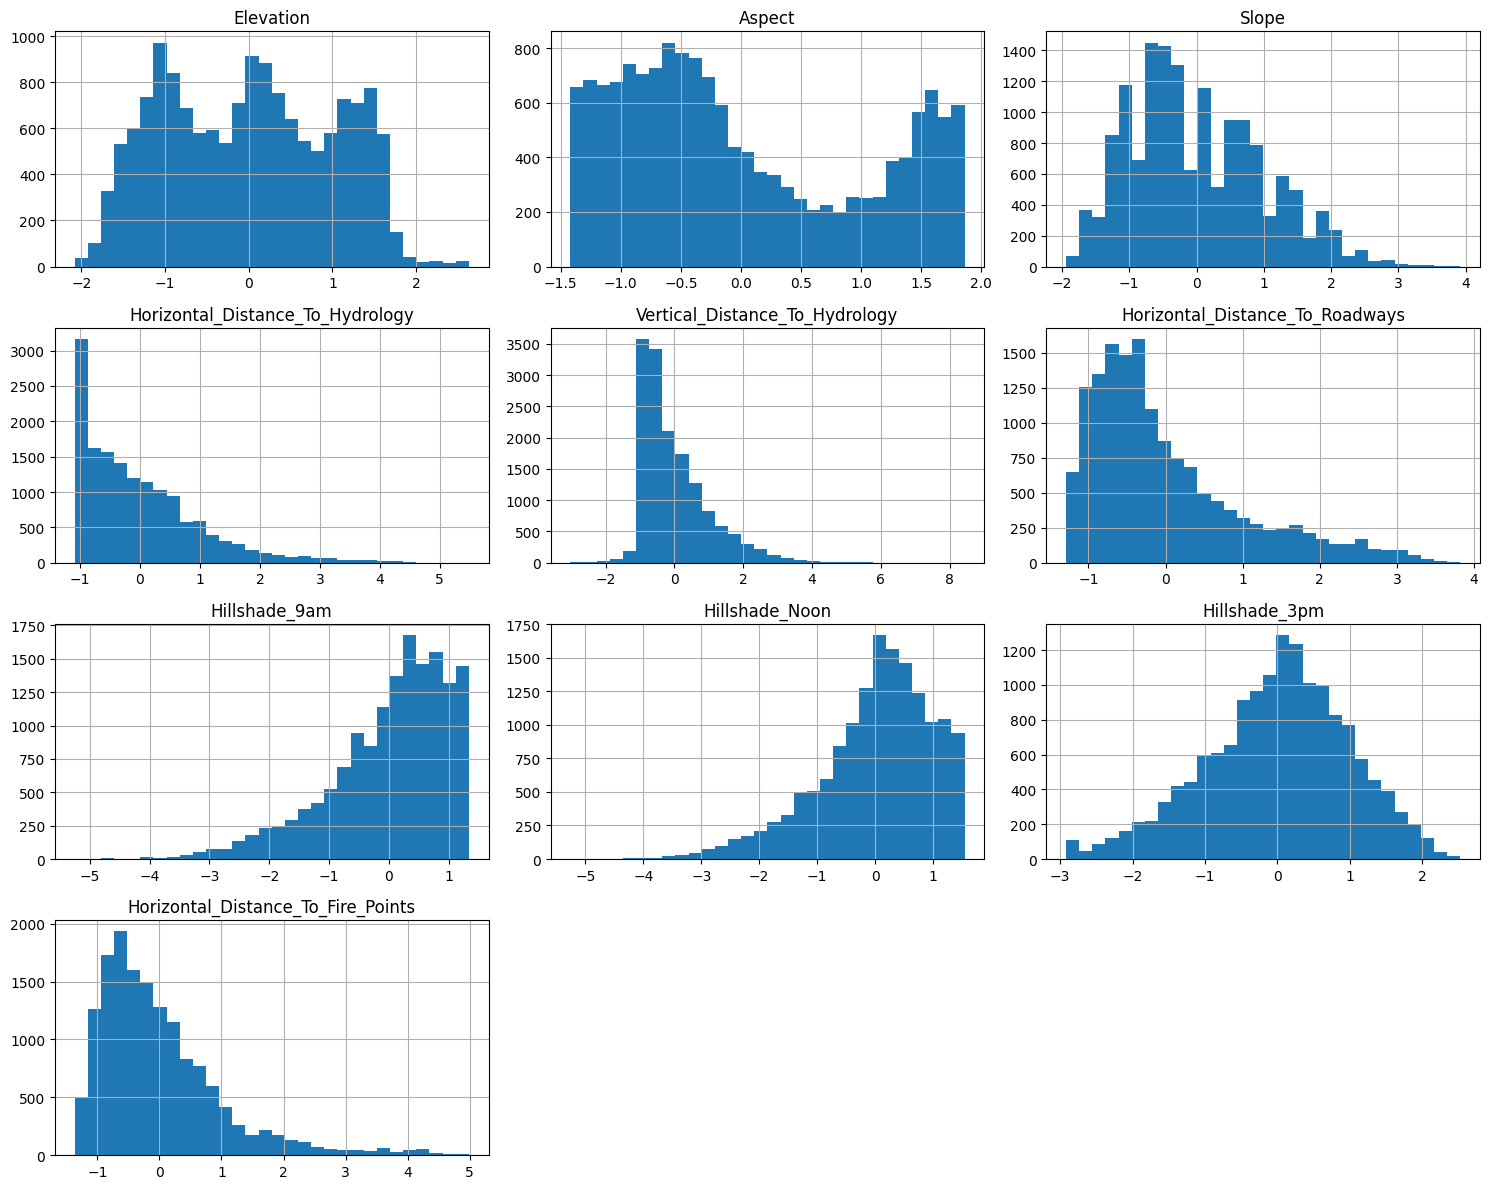

In [20]:
numerical_features = [
    "Elevation", "Aspect", "Slope", 
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Roadways", "Hillshade_9am", 
    "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"
]

# Plot histograms of the numerical features for the full dataset
df_standardized[numerical_features].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('train.csv')

# Separating the target column 'Cover_Type' from the features
X = df.drop(columns=['Cover_Type', 'Id'])  # Drop target and non-feature columns
y = df['Cover_Type']  # Target column

# (Optional) Normalize the numerical features
scaler = StandardScaler()
X_scaled = X.copy()

# List of numerical columns to be scaled
numerical_columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
    'Horizontal_Distance_To_Fire_Points'
]

# Apply scaling only to the numerical columns
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
for k in range(7, 12):
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_features=k)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Accuracy: 0.8628

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.80      0.79       427
           2       0.82      0.69      0.75       464
           3       0.84      0.82      0.83       400
           4       0.93      0.98      0.95       436
           5       0.89      0.94      0.92       452
           6       0.83      0.86      0.84       415
           7       0.94      0.96      0.95       430

    accuracy                           0.86      3024
   macro avg       0.86      0.86      0.86      3024
weighted avg       0.86      0.86      0.86      3024

Accuracy: 0.8687

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.81      0.80       427
           2       0.83      0.70      0.76       464
           3       0.84      0.83      0.83       400
           4       0.92      0.98      0.95       436
           5       0.88      0.95      0.92       

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('train.csv')

# Separating the target column 'Cover_Type' from the features
X = df.drop(columns=['Cover_Type', 'Id'])  # Drop target and non-feature columns
y = df['Cover_Type']  # Target column

# Normalize the numerical features (important for KNN)
scaler = StandardScaler()
X_scaled = X.copy()

# List of numerical columns to be scaled
numerical_columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
    'Horizontal_Distance_To_Fire_Points'
]

# Apply scaling only to the numerical columns
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors classifier (with k=5 by default)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7841

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.66      0.68       427
           2       0.69      0.58      0.63       464
           3       0.75      0.68      0.71       400
           4       0.87      0.95      0.91       436
           5       0.82      0.91      0.86       452
           6       0.73      0.77      0.75       415
           7       0.89      0.94      0.92       430

    accuracy                           0.78      3024
   macro avg       0.78      0.78      0.78      3024
weighted avg       0.78      0.78      0.78      3024



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('train.csv')

# Separating the target column 'Cover_Type' from the features
X = df.drop(columns=['Cover_Type', 'Id'])  # Drop target and non-feature columns
y = df['Cover_Type']  # Target column

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = X.copy()

# List of numerical columns to be scaled
numerical_columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
    'Horizontal_Distance_To_Fire_Points'
]

# Apply scaling only to the numerical columns
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', solver='lbfgs')

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/Users/aminechraibi/Desktop/Kaggle MAP/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7166

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.72      0.69       427
           2       0.63      0.48      0.55       464
           3       0.64      0.56      0.60       400
           4       0.81      0.87      0.84       436
           5       0.71      0.80      0.75       452
           6       0.62      0.68      0.65       415
           7       0.90      0.90      0.90       430

    accuracy                           0.72      3024
   macro avg       0.71      0.72      0.71      3024
weighted avg       0.71      0.72      0.71      3024



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Load the dataset
df = pd.read_csv('train.csv')

# Separating the target column 'Cover_Type' from the features
X = df.drop(columns=['Cover_Type', 'Id'])  # Drop target and non-feature columns
y = df['Cover_Type']  # Target column

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = X.copy()

# List of numerical columns to be scaled
numerical_columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
    'Horizontal_Distance_To_Fire_Points'
]

# Apply scaling only to the numerical columns
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7851

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.72      0.72       427
           2       0.74      0.58      0.65       464
           3       0.72      0.68      0.70       400
           4       0.86      0.95      0.90       436
           5       0.81      0.90      0.85       452
           6       0.71      0.73      0.72       415
           7       0.91      0.94      0.92       430

    accuracy                           0.79      3024
   macro avg       0.78      0.78      0.78      3024
weighted avg       0.78      0.79      0.78      3024



In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Load the dataset
df = pd.read_csv('train.csv')

# Separating the target column 'Cover_Type' from the features
X = df.drop(columns=['Cover_Type', 'Id'])  # Drop target and non-feature columns
y = df['Cover_Type']  # Target column

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = X.copy()

# List of numerical columns to be scaled
numerical_columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
    'Horizontal_Distance_To_Fire_Points'
]

# Apply scaling only to the numerical columns
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8013

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.73      0.73       427
           2       0.76      0.58      0.66       464
           3       0.74      0.74      0.74       400
           4       0.91      0.94      0.93       436
           5       0.80      0.91      0.85       452
           6       0.74      0.77      0.75       415
           7       0.90      0.95      0.93       430

    accuracy                           0.80      3024
   macro avg       0.80      0.80      0.80      3024
weighted avg       0.80      0.80      0.80      3024



In [33]:
from lightgbm import LGBMClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('train.csv')

# Separating the target column 'Cover_Type' from the features
X = df.drop(columns=['Cover_Type', 'Id'])  # Drop target and non-feature columns
y = df['Cover_Type']  # Target column

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = X.copy()

# List of numerical columns to be scaled
numerical_columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
    'Horizontal_Distance_To_Fire_Points'
]

# Apply scaling only to the numerical columns
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)


# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2107
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 44
[LightGBM] [Info] Start training from score -1.943021
[LightGBM] [Info] Start training from score -1.964602
[LightGBM] [Info] Start training from score -1.927561
[LightGBM] [Info] Start training from score -1.948228
[LightGBM] [Info] Start training from score -1.957552
[LightGBM] [Info] Start training from score -1.936120
[LightGBM] [Info] Start training from score -1.944753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the dataset
df = pd.read_csv('train.csv')

# 2. Separating the target column 'Cover_Type' from the features
X = df.drop(columns=['Cover_Type', 'Id'])  # Drop target and non-feature columns
y = df['Cover_Type']  # Target column

# 3. Normalize the numerical features (optional but recommended for scaling-sensitive models)
scaler = StandardScaler()
X_scaled = X.copy()

# List of numerical columns to be scaled
numerical_columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
    'Horizontal_Distance_To_Fire_Points'
]

# Apply scaling only to the numerical columns
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# 4. Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Set up the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],               # Number of trees
    'max_depth': [10, 20, 30, None],               # Maximum depth of trees
    'min_samples_split': [2, 5, 10],               # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                 # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],      # Number of features to consider at each split
    'bootstrap': [True, False]                     # Whether to use bootstrap samples
}

# 6. Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# 7. Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# 8. Fit the grid search to the data
grid_search.fit(X_train, y_train)

# 9. Print the best hyperparameters found
print(f"Best hyperparameters found: {grid_search.best_params_}")

# 10. Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# 11. Performance evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 12. Visualize grid search results for each hyperparameter
# Extract the results into a dataframe for easier visualization
results = pd.DataFrame(grid_search.cv_results_)

# Function to plot grid search results for a specific hyperparameter
def plot_grid_search(param_name, results):
    plt.figure(figsize=(10, 6))
    param_values = results['param_' + param_name].data
    mean_test_score = results['mean_test_score']
    
    plt.plot(param_values, mean_test_score, marker='o')
    plt.xlabel(param_name)
    plt.ylabel('Mean Test Score (Accuracy)')
    plt.title(f'Grid Search Results: {param_name}')
    plt.grid(True)
    plt.show()

# Plot the performance for each hyperparameter
for param in param_grid:
    plot_grid_search(param, results)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

/Users/aminechraibi/Desktop/Kaggle MAP/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
209 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aminechraibi/Desktop/Kaggle MAP/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aminechraibi/Desktop/Kaggle MAP/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/aminechraibi/Desktop/Kaggle MAP/.venv/lib/python3.11/site-packages/sklearn

Best hyperparameters found: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test set accuracy: 0.8773

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.81      0.81       427
           2       0.83      0.72      0.78       464
           3       0.84      0.86      0.85       400
           4       0.94      0.98      0.96       436
           5       0.90      0.94      0.92       452
           6       0.85      0.86      0.86       415
           7       0.96      0.97      0.96       430

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



AttributeError: 'Series' object has no attribute 'data'

<Figure size 1000x600 with 0 Axes>

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier

# 1. Load the dataset
df = pd.read_csv('train.csv')

# 2. Separating the target column 'Cover_Type' from the features
X = df.drop(columns=['Cover_Type', 'Id'])  # Drop target and non-feature columns
y = df['Cover_Type']  # Target column

# 3. Normalize the numerical features (optional but good practice for models)
scaler = StandardScaler()
X_scaled = X.copy()

# List of numerical columns to be scaled
numerical_columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
    'Horizontal_Distance_To_Fire_Points'
]

# Apply scaling only to the numerical columns
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# 4. Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Initialize the CatBoost Classifier (no tuning, using default parameters)
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42, verbose=False)

# 6. Train the model
catboost_model.fit(X_train, y_train)

# 7. Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# 8. Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject